### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [112]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [115]:
trainX.shape

(60000, 28, 28)

In [116]:
trainY.shape

(60000,)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class_names = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

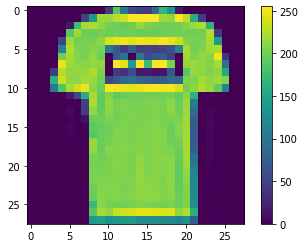

In [119]:
plt.figure()
plt.imshow(trainX[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#Maximum pixel value is 255 , so we scale the value between 0 to 1
trainX = trainX / 255.0
testX = testX / 255.0

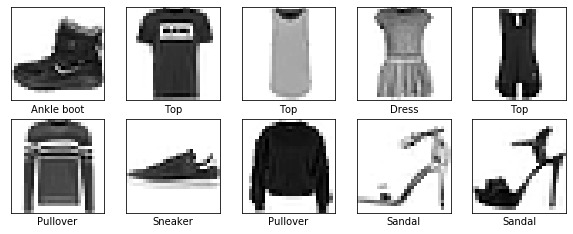

In [121]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [123]:
print(trainY.shape)
print('First 2 examples now are: ', trainY[0:2])

(60000, 10)
First 2 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [124]:
trainX.shape

(60000, 28, 28)

### Visualize the data

Plot first 10 images in the triaining set and their labels.

# Already done above before "Convert both training and testing labels into one-hot vectors"

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [127]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.9328 - acc: 0.7053 - val_loss: 0.7127 - val_acc: 0.7650
Epoch 2/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6445 - acc: 0.7931 - val_loss: 0.6282 - val_acc: 0.7912
Epoch 3/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5839 - acc: 0.8109 - val_loss: 0.5870 - val_acc: 0.8041
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5516 - acc: 0.8204 - val_loss: 0.5644 - val_acc: 0.8122
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.5303 - acc: 0.8251 - val_loss: 0.5489 - val_acc: 0.8152
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5147 - acc: 0.8295 - val_loss: 0.5372 - val_acc: 0.8184
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5029 - acc: 0.8332 - val_loss: 0.

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.add(tf.keras.layers.BatchNormalization())

### Execute the model

In [129]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 79us/sample - loss: 7.8004 - acc: 0.0432 - val_loss: 11.2453 - val_acc: 0.0726
Epoch 2/10
60000/60000 [==============================] - 4s 75us/sample - loss: 6.7865 - acc: 0.0763 - val_loss: 11.2829 - val_acc: 0.0796
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 10.5037 - acc: 0.0817 - val_loss: 10.8301 - val_acc: 0.0905
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 10.3806 - acc: 0.0870 - val_loss: 9.9290 - val_acc: 0.0913
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 10.3126 - acc: 0.0893 - val_loss: 9.9658 - val_acc: 0.0892
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 9.9270 - acc: 0.0828 - val_loss: 9.8519 - val_acc: 0.0848
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 9.9664 - acc: 0.0845 - val_lo

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='mse' ,metrics=['accuracy'])

In [133]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1075 - acc: 0.1024 - val_loss: 0.1136 - val_acc: 0.1031
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1045 - acc: 0.1024 - val_loss: 0.1096 - val_acc: 0.1029
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1022 - acc: 0.1020 - val_loss: 0.1074 - val_acc: 0.1031
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1005 - acc: 0.1022 - val_loss: 0.1054 - val_acc: 0.1029
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0993 - acc: 0.1027 - val_loss: 0.1039 - val_acc: 0.1028
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0984 - acc: 0.1031 - val_loss: 0.1028 - val_acc: 0.1034
Epoch 7/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0978 - acc: 0.1035 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#Using sgd optimizer with learning rate 0.03 and compiling model
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
#model.compile(optimizer=sgd_optimizer, loss='mse')

## Review model

In [141]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 784)               3136      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
______________________________________________

### Run the model

In [142]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 2.2075 - acc: 0.2625 - val_loss: 2.0160 - val_acc: 0.3496
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.7989 - acc: 0.4008 - val_loss: 1.6062 - val_acc: 0.4552
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 1.4902 - acc: 0.4900 - val_loss: 1.3694 - val_acc: 0.5288
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1.3019 - acc: 0.5324 - val_loss: 1.2151 - val_acc: 0.5635
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 1.1699 - acc: 0.5713 - val_loss: 1.0970 - val_acc: 0.6157
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.0616 - acc: 0.6238 - val_loss: 0.9952 - val_acc: 0.6527
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.9689 - acc: 0.6543 - val_loss: 0